<a href="https://colab.research.google.com/github/sharna33/CSE_4106_Digital-Image-Processing/blob/main/CSE_4106_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date: 08.09.2025

# 📝 Task

- Avg filter
- Weighted Avg filter
- Median
- High Boost filter
- Laplacian

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
def plot(original, filtered, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.show()

## **Manual Functions**

In [13]:
def avg_man(image):
  padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
  kernel = np.ones((3, 3), np.float32) / 9
  filtered_image = np.zeros_like(image)
  for i in range(1, padded_image.shape[0] - 1):
      for j in range(1, padded_image.shape[1] - 1):
          filtered_image[i - 1, j - 1] = np.sum(padded_image[i - 1:i + 2, j - 1:j + 2] * kernel)
  return filtered_image

def weighted_avg_man(image):
    padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
    kernel = np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ], np.float32)
    kernel /= np.sum(kernel)

    filtered_image = np.zeros_like(image)
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            neighborhood = padded_image[i - 1:i + 2, j - 1:j + 2]
            weighted = neighborhood * kernel
            value = np.sum(weighted)
            filtered_image[i - 1, j - 1] = value
    return filtered_image

def median_man(image):
    padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
    filtered_image = np.zeros_like(image)

    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            neighborhood = padded_image[i - 1:i + 2, j - 1:j + 2].flatten()
            median_value = np.median(neighborhood)
            filtered_image[i - 1, j - 1] = median_value

    return filtered_image

def high_boost_man(image, boost_factor=2):
    image_f = image.astype(np.float32)
    blur_image = avg_man(image_f).astype(np.float32)
    mask = image_f - blur_image
    high_boosted_image = image_f + boost_factor * mask
    high_boosted_image = np.clip(high_boosted_image, 0, 255).astype(image.dtype)
    return high_boosted_image

def laplac_man(image, kernel_sign=-1):
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]], np.float32)

    padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REPLICATE)

    lap_result = np.zeros_like(image, dtype=np.float32)
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            neighborhood = padded_image[i - 1:i + 2, j - 1:j + 2].astype(np.float32)
            lap_result[i - 1, j - 1] = np.sum(neighborhood * kernel)

    result = image.astype(np.float32) + kernel_sign * lap_result
    result = np.clip(result, 0, 255).astype(image.dtype)
    return result

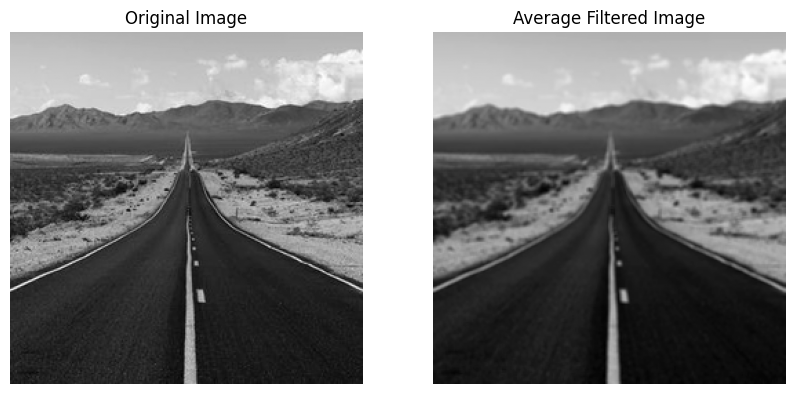

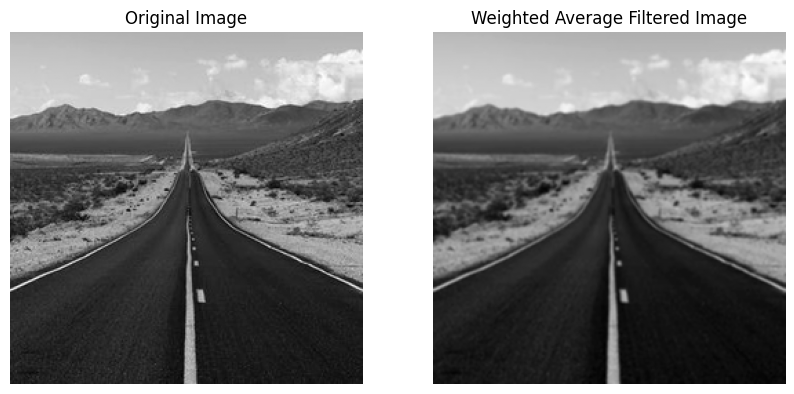

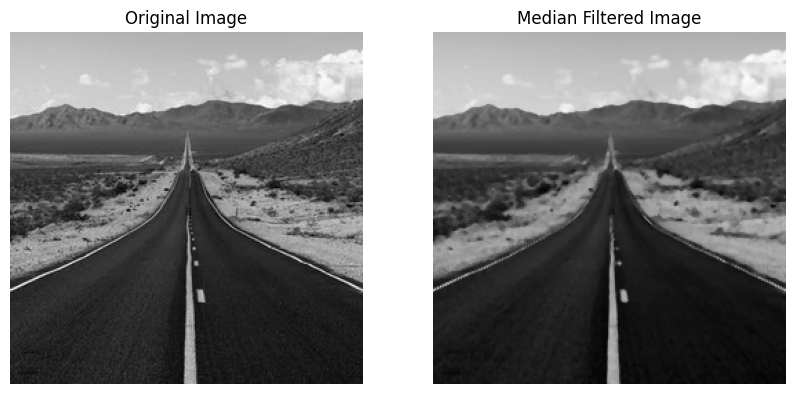

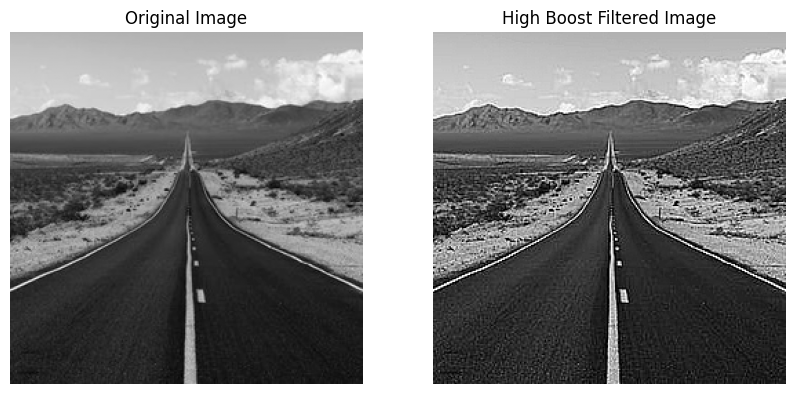

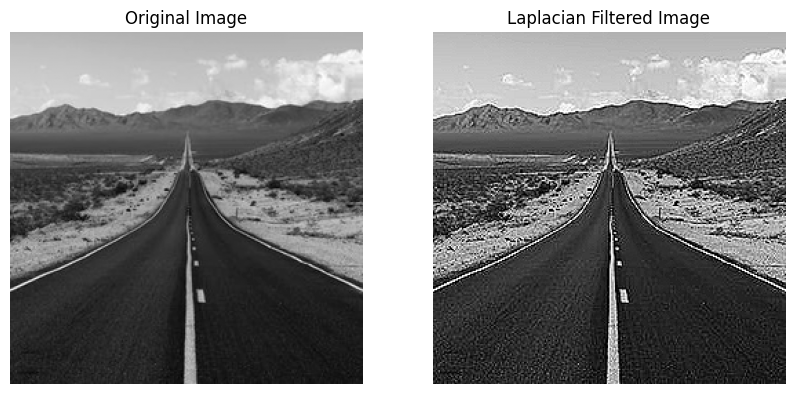

In [14]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CSE 4106/LAB 5/road.bmp', cv2.IMREAD_GRAYSCALE)
# image = cv2.resize(image, (400, 256))

avg_image = avg_man(image)
plot(image, avg_image, 'Average Filtered Image')

w_avg_img = weighted_avg_man(image)
plot(image, w_avg_img, 'Weighted Average Filtered Image')

median_image = median_man(image)
plot(image, median_image, 'Median Filtered Image')

hBoosted_image = high_boost_man(image, boost_factor=2.5)
plot(image, hBoosted_image, 'High Boost Filtered Image')

laplacian_image = laplac_man(image)
plot(image, laplacian_image, 'Laplacian Filtered Image')

## **Library Functions**

In [10]:
def avg_filter(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    return cv2.filter2D(image, -1, kernel)

def weighted_avg_filter(image, kernel_size=3):
    kernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]], np.float32)
    kernel /= np.sum(kernel)
    return cv2.filter2D(image, -1, kernel)

def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def high_boost_filter(image, boost_factor=1.5, blur_kernel_size=3):
    blurred = cv2.blur(image, (blur_kernel_size, blur_kernel_size)).astype(np.float32)
    image_f = image.astype(np.float32)
    mask = image_f - blurred
    high_boosted = image_f + boost_factor * mask
    high_boosted = np.clip(high_boosted, 0, 255).astype(image.dtype)
    return high_boosted

def laplacian_filter(image, kernel_sign=-1):
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]], np.float32)
    lap = cv2.filter2D(image.astype(np.float32), -1, kernel)
    result = image.astype(np.float32) + kernel_sign * lap
    result = np.clip(result, 0, 255).astype(image.dtype)
    return result


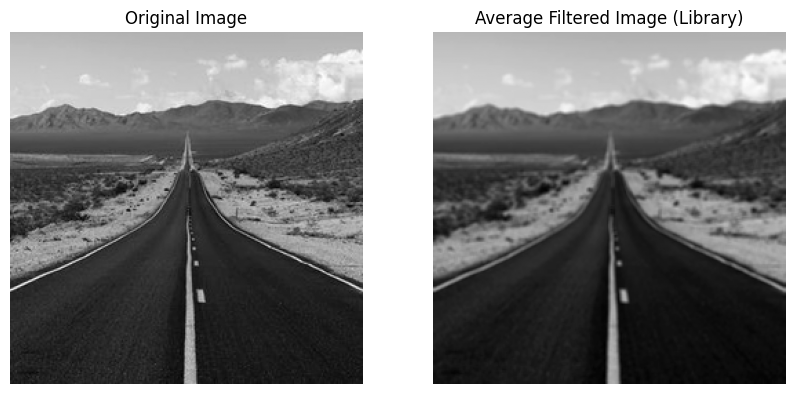

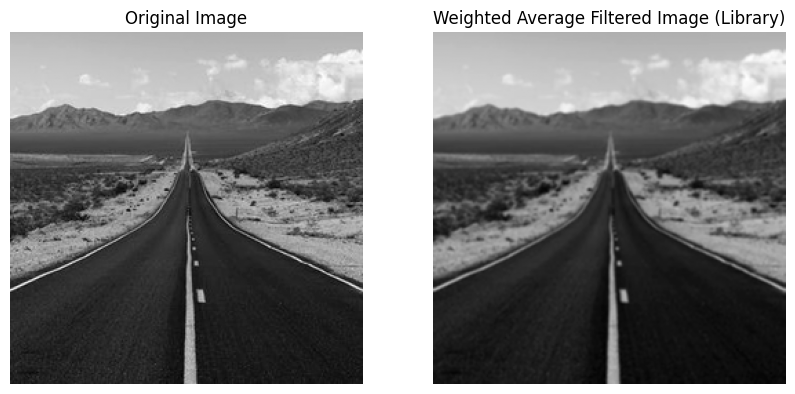

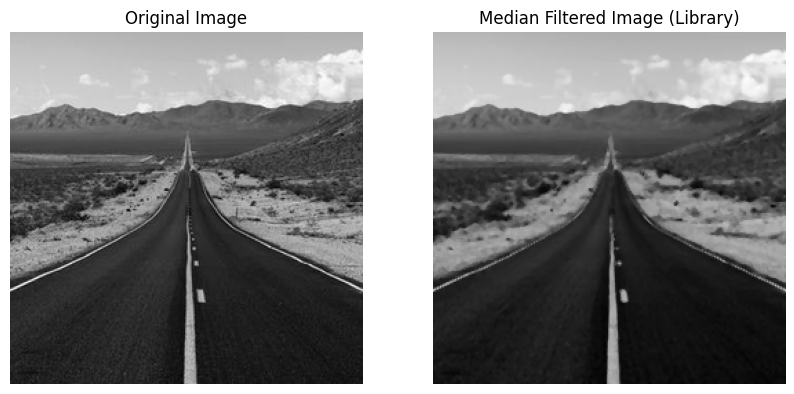

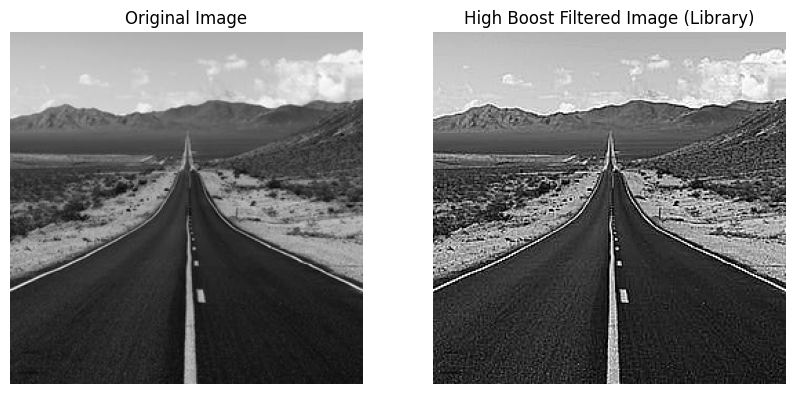

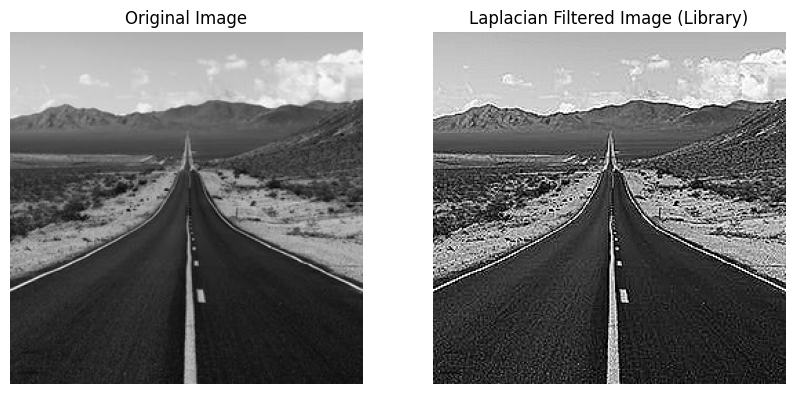

In [12]:
avg_image_lib = avg_filter(image)
plot(image, avg_image_lib, 'Average Filtered Image (Library)')

weighted_avg_image_lib = weighted_avg_filter(image)
plot(image, weighted_avg_image_lib, 'Weighted Average Filtered Image (Library)')

median_image_lib = median_filter(image)
plot(image, median_image_lib, 'Median Filtered Image (Library)')

hBoosted_image_lib = high_boost_filter(image, boost_factor=2.5)
plot(image, hBoosted_image_lib, 'High Boost Filtered Image (Library)')

laplacian_image_lib = laplacian_filter(image, kernel_sign=-1)
plot(image, laplacian_image_lib, 'Laplacian Filtered Image (Library)')